# IRIS DATA CLASSIFICATION

### IMPORT AND DATA MANIPULATION

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets 

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df1 = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df['target'].unique()

array([0, 1, 2])

### EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
df_seto = df[df['target'] == 0]
df_versi = df[df['target'] == 1]
df_virg = df[df['target'] == 2]

print(df_seto.shape[0], df_versi.shape[0], df_virg.shape[0])

50 50 50


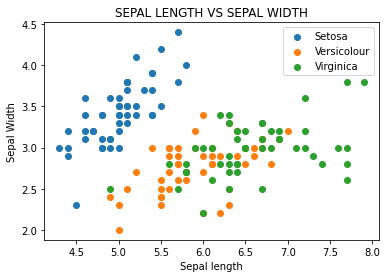

In [10]:
plt.scatter(df_seto['sepal length (cm)'], df_seto['sepal width (cm)'])
plt.scatter(df_versi['sepal length (cm)'], df_versi['sepal width (cm)'])
plt.scatter(df_virg['sepal length (cm)'], df_virg['sepal width (cm)'])

plt.title("SEPAL LENGTH VS SEPAL WIDTH")
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')

plt.legend(['Setosa', 'Versicolour', 'Virginica'])

plt.show()

> *It is clear from the above plot that, in terms of Sepal length, Setosa is generally shorter, but in terms of Sepal Width, Setosa is above average.*

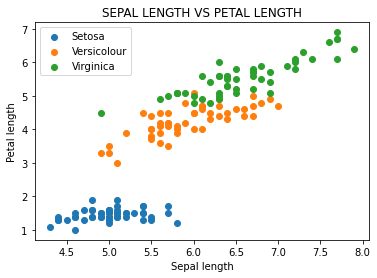

In [11]:
plt.scatter(df_seto['sepal length (cm)'], df_seto['petal length (cm)'])
plt.scatter(df_versi['sepal length (cm)'], df_versi['petal length (cm)'])
plt.scatter(df_virg['sepal length (cm)'], df_virg['petal length (cm)'])

plt.title("SEPAL LENGTH VS PETAL LENGTH")
plt.xlabel('Sepal length')
plt.ylabel('Petal length')

plt.legend(['Setosa', 'Versicolour', 'Virginica'])

plt.show()

> *In the above plot, it is clearly seen that in terms of length, both petal and sepal, Setosa is shorter, and Virginica is clearly longer. Versicolour is average in terms both sepal and petal length.*

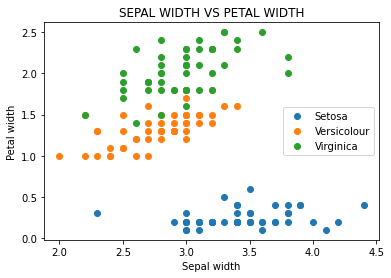

In [12]:
plt.scatter(df_seto['sepal width (cm)'], df_seto['petal width (cm)'])
plt.scatter(df_versi['sepal width (cm)'], df_versi['petal width (cm)'])
plt.scatter(df_virg['sepal width (cm)'], df_virg['petal width (cm)'])

plt.title("SEPAL WIDTH VS PETAL WIDTH")
plt.xlabel('Sepal width')
plt.ylabel('Petal width')

plt.legend(['Setosa', 'Versicolour', 'Virginica'])

plt.show()

> *This plot, in contrast to the length plot, shows a different trend. By sepal width, Setosa is on average the most wide of the 3, while the opposite is true in terms of petal width.*

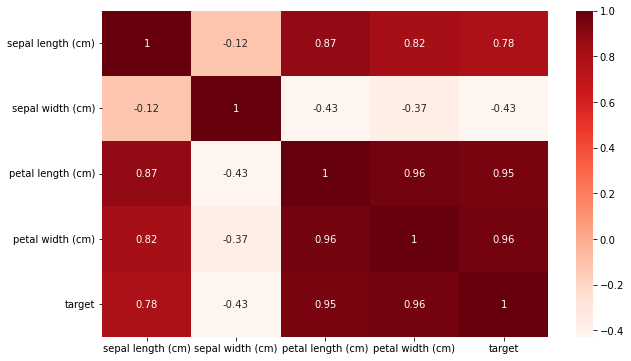

In [33]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap = 'Reds', annot = True)
plt.show()

## *FEATURE SELECTION, AND SCALING DO NOT SEEM TO BE REQUIRED FOR THIS DATA*

### TRAIN TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
from sklearn.metrics import *

In [17]:
X = df1
y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
gnb = GaussianNB()
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()

In [44]:
def plot_decision_boundaries(X, y, model, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model: model object
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature 1",fontsize=15)
    plt.ylabel("Feature 2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

### NAIVE BAYES

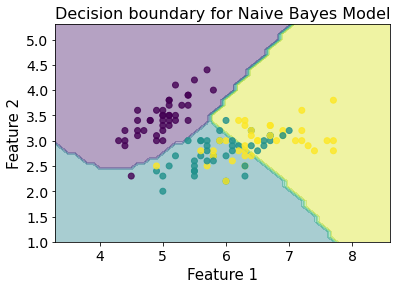

In [45]:
plt.figure()
plt.title("Decision boundary for Naive Bayes Model", fontsize = 16)
plot_decision_boundaries(X_train, y_train, gnb)
plt.show()

### LOGISTIC REGRESSION

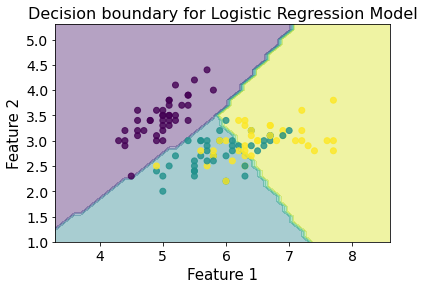

In [47]:
plt.figure()
plt.title("Decision boundary for Logistic Regression Model", fontsize = 16)
plot_decision_boundaries(X_train, y_train, lr)
plt.show()

### KNN

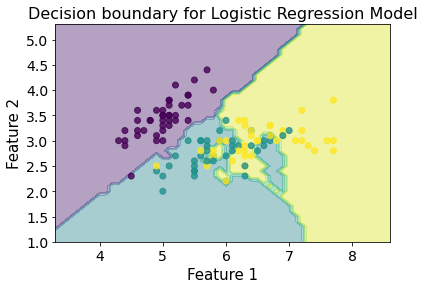

In [48]:
plt.figure()
plt.title("Decision boundary for Logistic Regression Model", fontsize = 16)
plot_decision_boundaries(X_train, y_train, knn)
plt.show()

### SVC

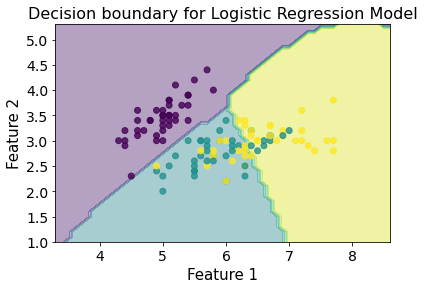

In [49]:
plt.figure()
plt.title("Decision boundary for Logistic Regression Model", fontsize = 16)
plot_decision_boundaries(X_train, y_train, svc)
plt.show()